# Evolving Niches with Noise
## Preliminary results for noise on channels 0-2 after 300 generations

50 simulations of 300 generations were run without any noise to evolve a set of populations that are not noise-adapted.
Of those 50, the simulation 5 was chosen as a base for the noisy simulations.
The simulations below take the population that existed at generation 300 of the noise-less simulations and evolve them for another 300 generations under noisy conditions.
Here, noise is added to channels 0-2 to interfere with communication on those channels.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import logging

%aimport -matplotlib
%aimport -pandas
%aimport -logging

import analysis.ks
import dataframe.calculations.spectrum
import visualize.dataframe
plt.style.use(['dark_background'])

logging.basicConfig(level=logging.DEBUG, format='%(asctime)s - %(threadName)s - %(name)s - %(levelname)s - %(message)s')

rootlogger = logging.getLogger()
f = logging.Filter(name='evolvingniches')
logger = logging.getLogger('evolvingniches.run')
rootlogger.addFilter(f)
logger = logging.getLogger('evolvingniches.jupyter')

In [153]:
directory = '/Users/davk/Documents/phd/projects/EvolvingNiches/data/20D23_g300_c012_i1_600x50/'
base_run = 105

## Average of the 50 runs

The plot below shows the average spectrum of all 50 noisy simulations.
Remember that generations 1-300 are from run number 5 of the noise-less simulation and generations 301-600 are the average of 50 noisy runs.
Note that, on average, the populations are able to abandon channel 2, but not channel 0.

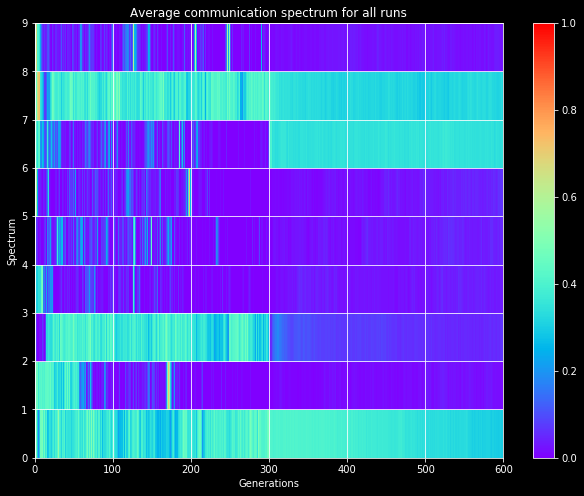

In [147]:
spectra = pd.read_parquet(directory + 'encoded_spectrum.parquet')

visualize.dataframe.plot_spectrum(spectra, vmin=0.0, vmax=1.0, view=True, filename=None)

## Individual Runs

It's important to see the variation in the individual runs as well.
The 50 runs are split between the two plots below with the first showing runs 0-24 and the second showing 25-49
(it is ordered so that the first row is runs 0-4 and so on).


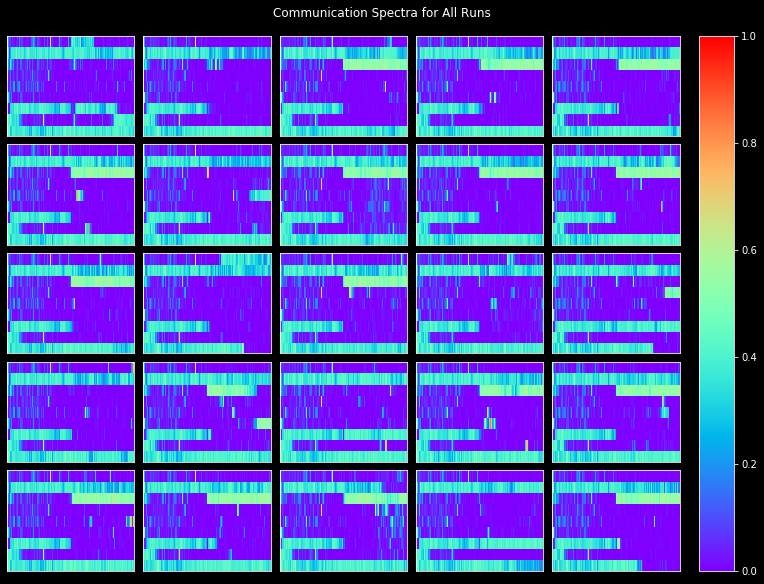

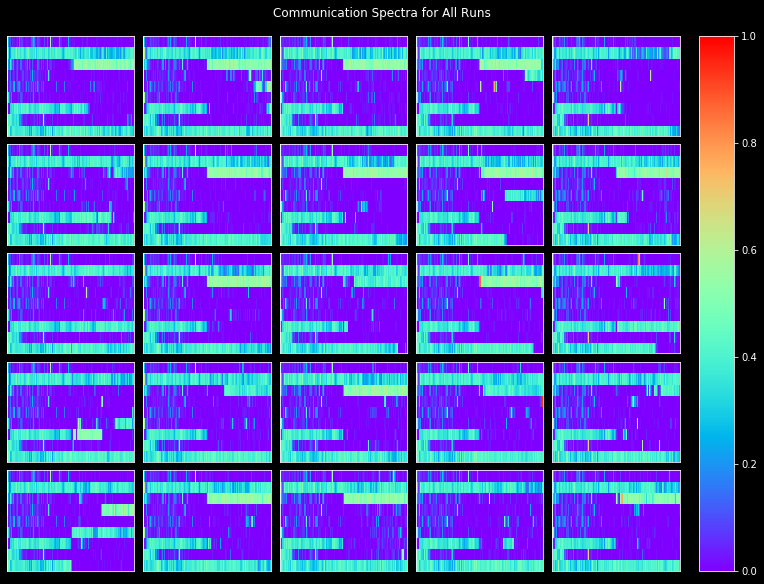

In [150]:
visualize.dataframe.plot_run_spectra(spectra, vmin=0.0, vmax=1.0, view=True, filename=None, shape=(5, 5), base_run=base_run)

visualize.dataframe.plot_run_spectra(spectra.loc[25:], vmin=0.0, vmax=1.0, view=True, filename=None, shape=(5, 5), base_run=base_run)

## Runs 5, 0, and 45

I've highlighted runs 5, 0, and 45 below because they are each interesting in their own way.
### Run 5
Run 5 is a pretty average run.
The population almost immediately drops channel 2 in favour of channel 6, but keeps channel 0 for the duration of the simulation.
### Run 0
Run 0 seems confused. It drops channel 2 right away and plays with channels 1, 6, and 9 before picking 2 back up and eventually dropping the rest.
However, towards the end of the simulation, it drops 2 again and switches over to another noisy channel - channel 1.
Why does it do this? What does this do to its fitness?

### Run 45
Run 45 is the only one that seemingly gets it "right".
It drops channels 0 and 2 right away and picks up channel 3 almost immediately.
Eventually, it also picks up channel 5 and has now moved fully away from the noisy channels towards a 3-channel noiseless setup.

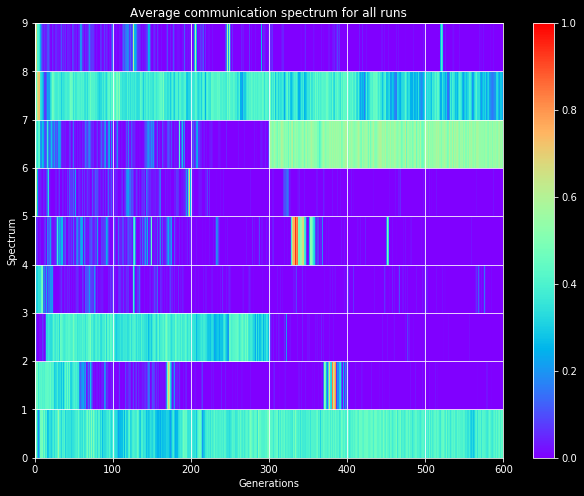

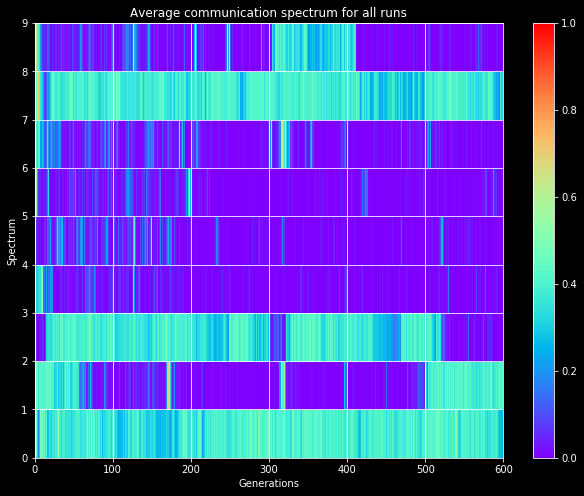

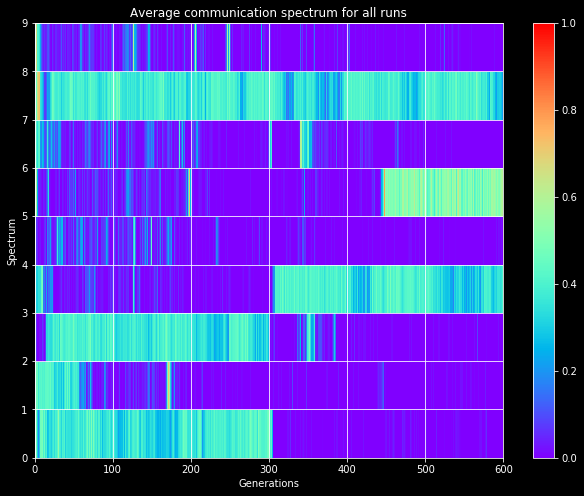

In [155]:
run = spectra.loc[((5, base_run), slice(None), slice(None)),:]
visualize.dataframe.plot_spectrum(run, vmin=0.0, vmax=1.0, view=True, filename=None)

run = spectra.loc[((0, base_run), slice(None), slice(None)),:]
visualize.dataframe.plot_spectrum(run, vmin=0.0, vmax=1.0, view=True, filename=None)

run = spectra.loc[((45, base_run), slice(None), slice(None)),:]
visualize.dataframe.plot_spectrum(run, vmin=0.0, vmax=1.0, view=True, filename=None)

# Questions and To Do
## To Do
* Plot the fitnesses because that will help answer some of this.
* Run a simulation where only one channel begins in the noisy zone (this was using two channels that became noisy). Are more of the runs able to abandon the channel in this scenario?

## Questions
1. Why did most of the simulations move away from channel 2 but not 0? Both were equally noisy. Was channel 2 adding less to the fitness?
1. Why did most of them pick up channel 6? There seems to have been some recent activity on that channel? Was there a subpopulation that was maintaining connections there?
1. Is run 45 actually the fittest? Did it manage to find a path around a local optimum that most others didn't?
1. Is the conclusion that the population was generally able partially adapt, but not fully, and that the noise still tended to impact its fitness? 

## Also
In addition to this, I have done a bunch of other runs that will be part of the paper:
1. 50 runs of 300 generations with no noise (run number 5, the base run for these simulations comes from this set)
1. 50 runs of 300 generations with noise on channels 0-2 to compare with the noiseless runs.
1. 50 runs of run number 5 + another 300 generations with no noise for comparison with the runs plotted above.
1. A set of 50 noisy and 50 noiseless runs with a different base (run number 4 from **2**). In this base run, all 3 of the used channels are outside the range 0-2, where noise comes in after generation 300, so not much changes. But it is good for showing that it is the presence of noise on channels that are used that is important!

In [2]:
%%script false --no-raise-error

last10 = dataframe.calculations.spectrum.specific_generation_over_runs(range(289,299), spectra=spectra)

visualize.dataframe.plot_channel_volume_histogram(last10, view=True, filename=None)

In [137]:
%%script false --no-raise-error

ks_stat, ks_p = analysis.ks.kolmogorov_smirnov_matrix(last10)

stat_cluster_centers_indices, stat_labels = analysis.ks.kolmogorov_smirnov_clusters(ks_stat)
p_cluster_centers_indices, p_labels = analysis.ks.kolmogorov_smirnov_clusters(ks_p) 


